In [576]:
library("igraph",lib.loc = '../../../R-pkgs/')
library("dplyr",lib.loc = '../../../R-pkgs/')
library("ggtree",lib.loc = '../../../R-pkgs/')
library('ggplot')

Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 

ggtree v2.0.1  For help: https://yulab-smu.github.io/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

- Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods for mapping and visualizing associated data on phylogeny using ggtree. Molecular Biology and Evolution 2018, 35(12):3041-3043. doi: 10.1093/molbev/msy194
- Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam. ggtree: an R package for visualization and annotation of phylogenetic trees with their covariates and other associated data. Methods in Ecology and Evolution 2017, 8(1):28-36, doi:10.1111/2041-210X.12628





ERROR: Error in library("ggplot"): there is no package called ‘ggplot’


In [536]:
el = read_graph('../../data/processed/mta-elevators.graphml',format = 'graphml')

In [537]:
el

IGRAPH f13de36 U--- 1108 1095 -- 
+ attr: label (v/c), node_type (v/c), id (v/c)
+ edges from f13de36:
 [1]  1-- 3  1-- 4  2-- 3  2-- 4  2-- 6  2--12  2--22  5-- 6  5-- 7  5-- 8
[11]  5-- 9  5--10 11--12 11--13 11--14 11--15 11--16 11--17 11--18 11--19
[21] 11--20 21--22 21--23 21--24 21--25 21--26 27--29 27--33 28--29 28--30
[31] 28--31 32--33 32--34 32--35 36--38 37--38 37--40 37--45 39--40 39--41
[41] 39--42 39--43 44--45 44--46 44--47 44--48 49--51 50--51 50--53 50--59
[51] 50--63 52--53 52--54 52--55 52--56 52--57 58--59 58--60 58--61 62--63
[61] 62--64 62--65 62--66 62--67 68--70 68--74 69--70 69--71 69--72 73--74
[71] 73--75 73--76 77--79 78--79 78--81 78--84 78--88 78--92 80--81 80--82
+ ... omitted several edges

In [538]:
unique(get.vertex.attribute(el,'node_type'))

[1] "Street"          "Mezzanine"       "Elevator"        "Platform"       
 [5] "Train"           "Lower Mezzanine" "Upper Mezzanine" "Unknown"        
 [9] "Mezzanine 401"   "Mezzanine 444"

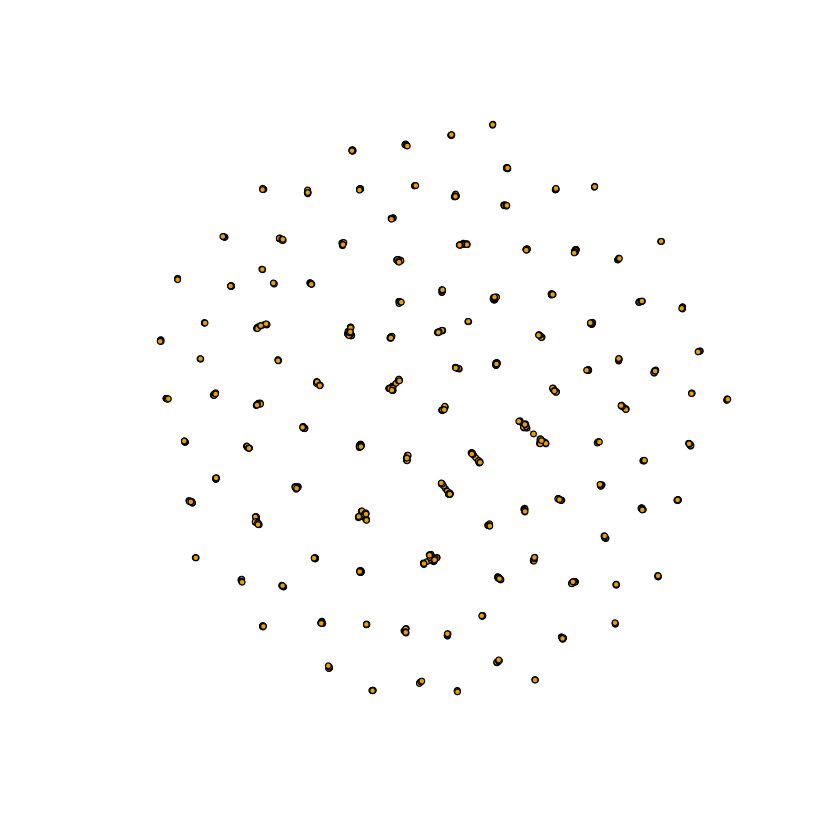

In [539]:
plot(el,vertex.size=2,vertex.label=NA)

In [540]:
comp = components(el)
V(el)$component <- comp$membership

In [541]:
mapcolors <- function(x){
    if(x=="Elevator"){
        return("lightblue")
    }else if(x=='Street'){
        return("orange")
    }else if(x=="Platform"){
        return("white")
    }else if(grepl(pattern = "Mezzanine",x = x)){
        return("yellow")
    }else if(x=="Train"){
        return("red")
    }else {
        return("black")
    }
}

In [542]:
cols <- sapply(V(el)$node_type,FUN=mapcolors,simplify = TRUE)
V(el)$color <- cols

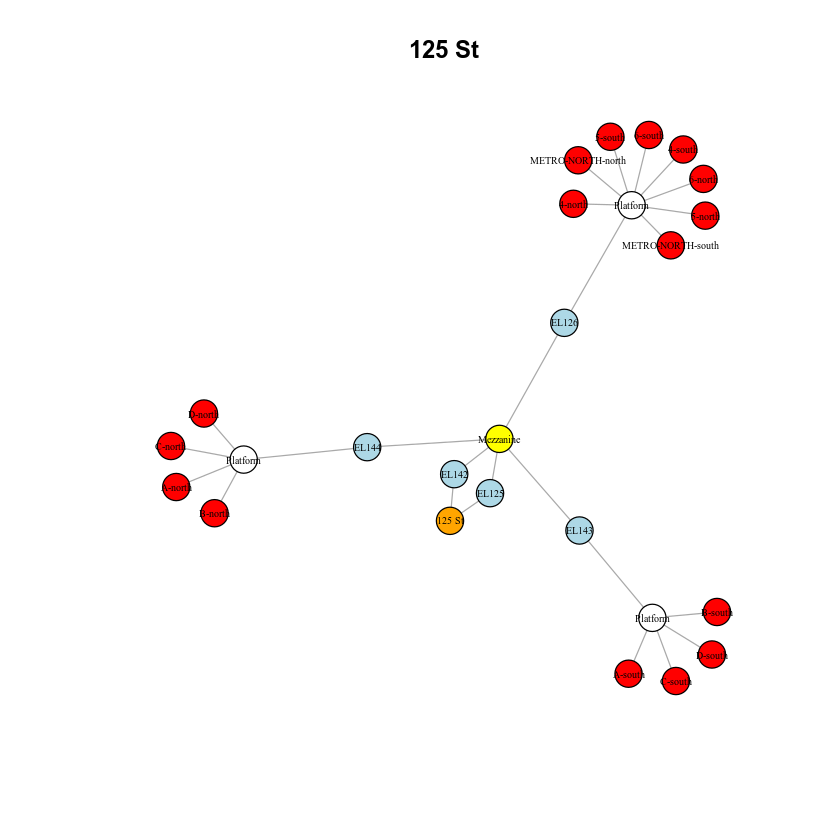

In [543]:
g <- induced_subgraph(el,V(el)[V(el)$component == 1])
plot(g,color=V(g)$color,vertex.size=10,vertex.label.cex=0.5,vertex.label.color='black',main=V(g)$label[V(g)$node_type=="Street"])

In [237]:
ee <- read.csv('../../data/interim/crosswalks/EE_master_list.csv',stringsAsFactors = F)

In [419]:
head(ee[grepl(pattern = "Myr",ee$station_name),])

,X,station_name,equipment_id,description,borough,subway_lines,equipment_type,ada_compliant,is_active,direction,subset_lines,connection_to_street,st_name_opd_format,line,notes,geometry,lat,lon
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
505,504,Myrtle Av / Wyckoff Av,EL396,Gates Ave & Wyckoff Ave (SE corner) to Mezzanine for service in both directions on all lines,BKN,L/M,EL,Y,Y,both directions,L/M,N,Myrtle Ave,J-M-Z,"J,M-all times, Z-rush hours AM westbound, PM eastbound",POINT (-73.9356230012996 40.6971950005145),40.6972,-73.93562
506,505,Myrtle Av / Wyckoff Av,ES333,Lower Mezzanine to Upper Mezzanine,BKN,L/M,ES,N,Y,,L/M,N,Myrtle Ave,J-M-Z,"J,M-all times, Z-rush hours AM westbound, PM eastbound",POINT (-73.9356230012996 40.6971950005145),40.6972,-73.93562
507,506,Myrtle Av / Wyckoff Av,ES332,Lower Mezzanine to Upper Mezzanine,BKN,L/M,ES,N,Y,,L/M,N,Myrtle Ave,J-M-Z,"J,M-all times, Z-rush hours AM westbound, PM eastbound",POINT (-73.9356230012996 40.6971950005145),40.6972,-73.93562
508,507,Myrtle Av / Wyckoff Av,EL397,Mezzanine to L Platform for service in both directions,BKN,L/M,EL,Y,Y,both directions,L/M,N,Myrtle Ave,J-M-Z,"J,M-all times, Z-rush hours AM westbound, PM eastbound",POINT (-73.9356230012996 40.6971950005145),40.6972,-73.93562
509,508,Myrtle Av / Wyckoff Av,EL398,Mezzanine to M Platform for service in both directions,BKN,L/M,EL,Y,Y,both directions,L/M,N,Myrtle Ave,J-M-Z,"J,M-all times, Z-rush hours AM westbound, PM eastbound",POINT (-73.9356230012996 40.6971950005145),40.6972,-73.93562


In [558]:
pdf('../../reports/figures/station_graphs.pdf')
par(mfrow=c(2,2),mar=c(5.1,4.1,4.1,2.1))
unique_comps = unique(V(el)$component)
incomplete_stations = vector()
for (i in unique_comps){
#     if((i-1) %% 9 == 0){
#         par(mfrow=c(3,3),mar=c(5.1,4.1,4.1,2.1))
#     }
    g <- induced_subgraph(el,V(el)[V(el)$component == i])
    if(("Street" %in% V(g)$node_type)){
        incomplete_stations <- c(incomplete_stations,V(g)$label[V(g)$node_type == "Elevator"])
        plot(g,color=V(g)$color,vertex.size=15,vertex.label.cex=0.01,vertex.label.dist=0,vertex.label.color='black',layout=layout_as_tree(g,root=V(g)[V(g)$node_type == "Street"]),main=unique(ee$station_name[ee$equipment_id %in% V(g)$label]))
    }
}
dev.off()

png 
  2

In [333]:
el_centrality <- data.frame(el_id = V(el)$label[V(el)$node_type == "Elevator"],
                            eig_cent = centr_eigen(el)$vector[V(el)$node_type == "Elevator"],
                            bw_cent = centr_betw(el)$res[V(el)$node_type == "Elevator"],stringsAsFactors = F)

In [335]:
el_centrality %>% arrange(desc(bw_cent)) %>% head(10)

el_id,eig_cent,bw_cent
<chr>,<dbl>,<dbl>
EL723,0.000000e+00,650
EL232,2.455622e-01,380
EL301,0.000000e+00,342
EL720,4.530164e-18,308
EL733X,0.000000e+00,308
EL719,1.041995e-17,230
EL721,0.000000e+00,230
EL732,0.000000e+00,230
EL729X,0.000000e+00,230


In [340]:
el_centrality[el_centrality$el_id %in% c("EL717X","EL718X"),]

,el_id,eig_cent,bw_cent
,<chr>,<dbl>,<dbl>
224,EL718X,1.801917e-17,70.5
225,EL717X,7.081553e-18,70.5


[1] "EL225" "EL215" "EL216" "EL214" "EL34X" "EL227" "EL228" "EL226"

[1]  90 140  62  62   0  90 182  90


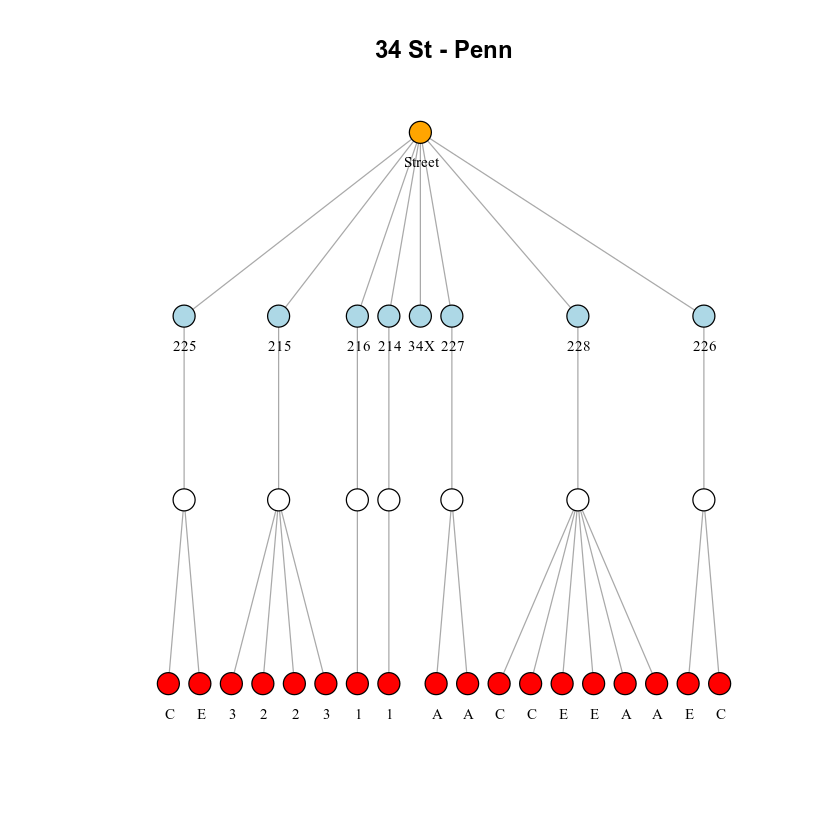

In [439]:
par(mfrow=c(1,1))
h <- induced_subgraph(el,V(el)[V(el)$component == comp$membership[V(el)$label == "EL227"]])
V(h)$label[V(h)$node_type == "Elevator"]
print(centr_betw(h)$res[V(h)$node_type == "Elevator"])
plot(h,vertex.size=8,vertex.label.degree=67.5,vertex.label=gsub(pattern="-north|-south|Platform|Upper|Lower|Mezzanine|EL",'',V(h)$label),vertex.label.cex=0.75,vertex.label.color='black',vertex.label.dist=-1.5,layout=layout_as_tree(h,root=V(h)[V(h)$node_type == "Street"]),main=unique(ee$station_name[ee$equipment_id %in% V(h)$label]))

[1] "EL277"

[1] 0


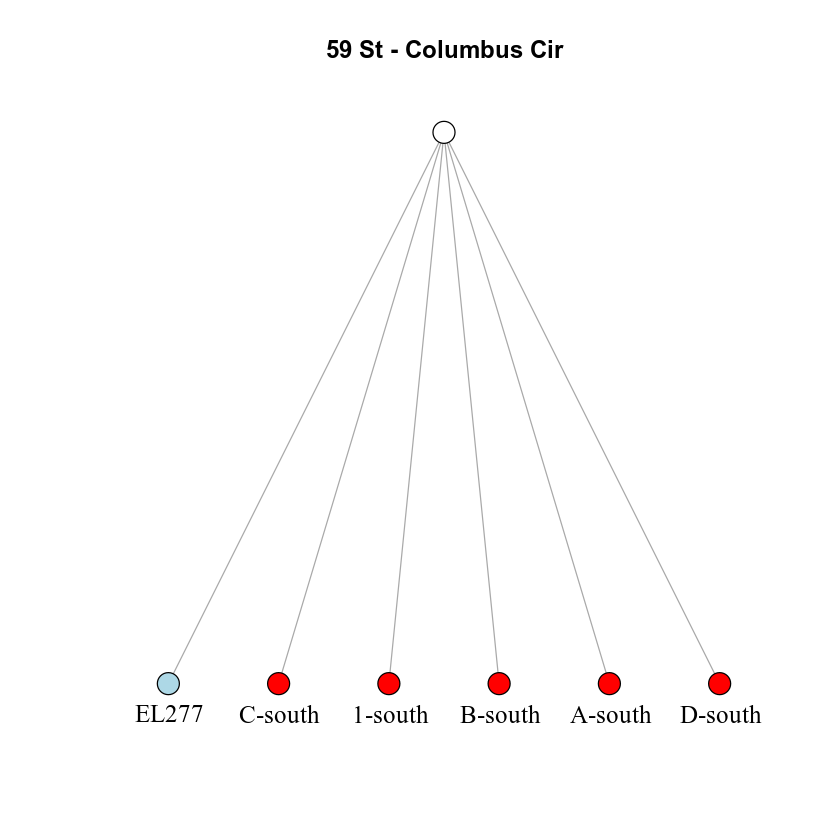

In [544]:
par(mfrow=c(1,1))
h <- induced_subgraph(el,V(el)[V(el)$component == comp$membership[V(el)$label == "EL277"]])
V(h)$label[V(h)$node_type == "Elevator"]
print(centr_betw(h)$res[V(h)$node_type == "Elevator"])
plot(h,vertex.size=8,vertex.label.degree=67.5,vertex.label=gsub(pattern="Platform|Upper|Lower|Mezzanine",'',V(h)$label),vertex.label.cex=1.25,vertex.label.color='black',vertex.label.dist=-1.5,layout=layout_as_tree(h,root=V(h)[V(h)$node_type == "Street"]),main=unique(ee$station_name[ee$equipment_id %in% V(h)$label]))

drop elevator and check connectedness of the graph

In [362]:
V(h)
V(h)$label

+ 10/10 vertices, from 67c25f2:
 [1]  1  2  3  4  5  6  7  8  9 10

[1] "EL396"                  "Myrtle Av / Wyckoff Av" "Mezzanine"             
 [4] "EL397"                  "Platform"               "EL398"                 
 [7] "L-south"                "M-north"                "L-north"               
[10] "M-south"

In [372]:
all_simple_paths(h,from = V(h)[V(h)$node_type == "Street"],to =  V(h)[V(h)$node_type == "Train"])

[[1]]
+ 6/10 vertices, from 67c25f2:
[1] 2 1 3 4 5 7

[[2]]
+ 6/10 vertices, from 67c25f2:
[1] 2 1 3 4 5 8

[[3]]
+ 6/10 vertices, from 67c25f2:
[1] 2 1 3 4 5 9

[[4]]
+ 6/10 vertices, from 67c25f2:
[1]  2  1  3  4  5 10

[[5]]
+ 6/10 vertices, from 67c25f2:
[1] 2 1 3 6 5 7

[[6]]
+ 6/10 vertices, from 67c25f2:
[1] 2 1 3 6 5 8

[[7]]
+ 6/10 vertices, from 67c25f2:
[1] 2 1 3 6 5 9

[[8]]
+ 6/10 vertices, from 67c25f2:
[1]  2  1  3  6  5 10


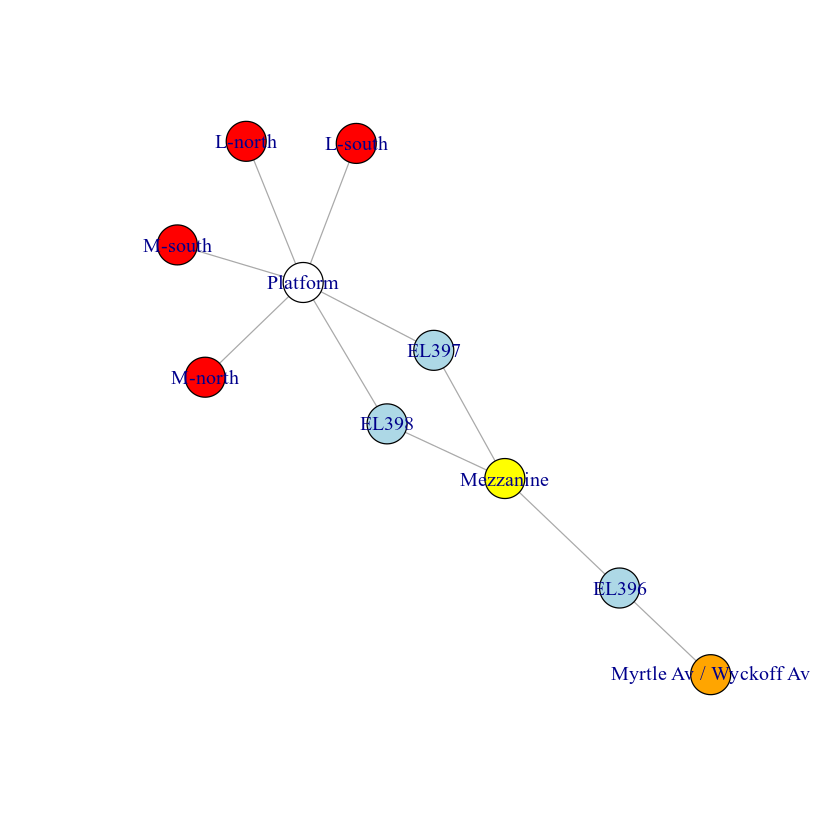

In [421]:
plot(h)

In [424]:
h_tmp <- delete_vertices(h,V(h)[V(h)$label == "EL396"])

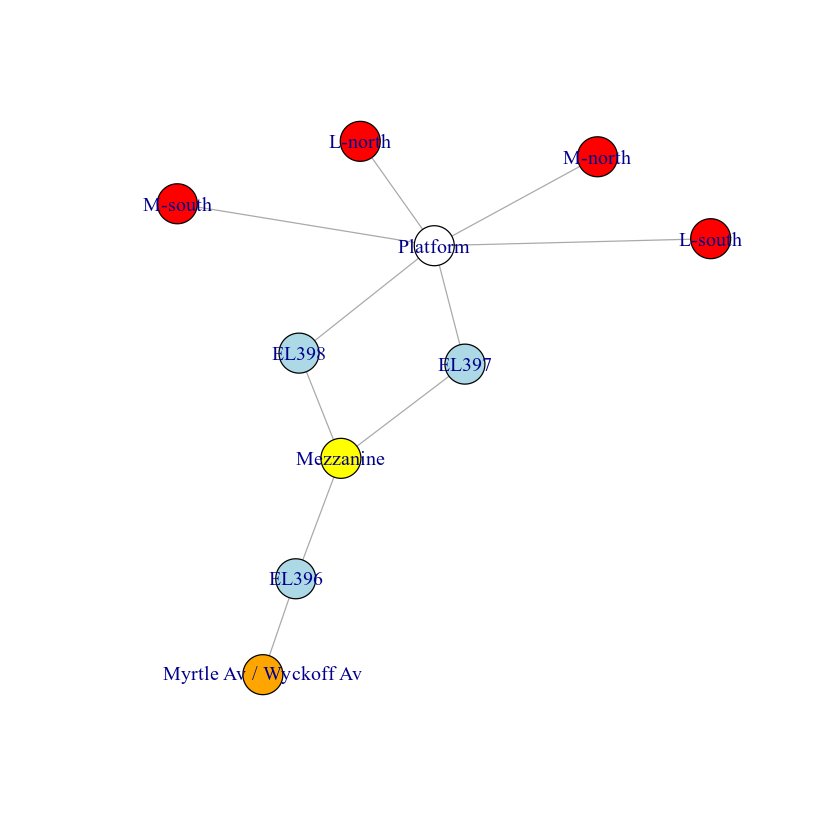

In [432]:
plot(induced_subgraph(el,subcomponent(el,V(el)[V(el)$label == "EL396"])))

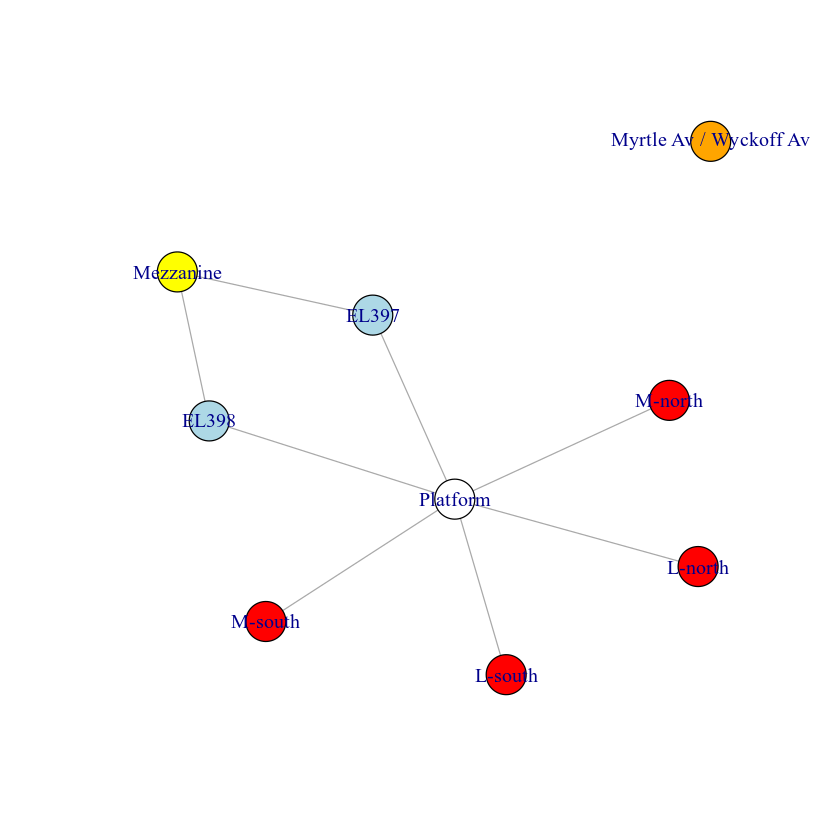

In [433]:
plot(h_tmp)

In [426]:
centr_betw(h)

$res
 [1]  8.0  0.0 14.5  7.5 26.5  7.5  0.0  0.0  0.0  0.0

$centralization
[1] 0.6203704

$theoretical_max
[1] 324

In [448]:
routes <- read.csv('../../data/raw/google_transit/routes.txt',stringsAsFactors = F)

In [456]:
head(routes)

route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,MTA NYCT,1,Broadway - 7 Avenue Local,"Trains operate between 242 St in the Bronx and South Ferry in Manhattan, at all times",1,http://web.mta.info/nyct/service/pdf/t1cur.pdf,EE352E,
2,MTA NYCT,2,7 Avenue Express,"Trains operate between Wakefield-241 St, Bronx, and Flatbush Av-Brooklyn College, Brooklyn, at all times. Trains operate local in Bronx and Brooklyn. Trains operate express in Manhattan except late night when it operates local.",1,http://web.mta.info/nyct/service/pdf/t2cur.pdf,EE352E,
3,MTA NYCT,3,7 Avenue Express,"Trains operate between 148 St, 7 Av, Manhattan, and New Lots Av, Brooklyn, at all times except late nights. During late nights, trains operate only in Manhattan between 148 St, 7 Av and Times Square-42 St.",1,http://web.mta.info/nyct/service/pdf/t3cur.pdf,EE352E,
4,MTA NYCT,4,Lexington Avenue Express,"Trains operate daily between Woodlawn/Jerome Av, Bronx, and Utica Av/Eastern Pkwy, Brooklyn, running express in Manhattan and Brooklyn. During late night and early morning hours, trains run local in Manhattan and Brooklyn, and extend beyond Utica Av to New Lots/Livonia Avs, Brooklyn.",1,http://web.mta.info/nyct/service/pdf/t4cur.pdf,00933C,
5,MTA NYCT,5,Lexington Avenue Express,"Weekdays daytime, most trains operate between either Dyre Av or 238 St-Nereid Av, Bronx, and Flatbush Av-Brooklyn College, Brooklyn. At all other times except during late nights, trains operate between Dyre Av, Bronx, and Bowling Green, Manhattan. During late nights trains operate only in the Bronx between Dyre Av and E 180 St/MorrisPark Av. Customers who ride during late night hours can transfer to 2 service at the E 180 St Station. At all times, trains operate express in Manhattan and Brooklyn. Weekdays, trains in the Bronx operate express from E 180 St to 149 St-3 Av during morning rush hours (from about 6 AM to 9 AM), and from 149 St-3 Av to E 180 St during the evening rush hours (from about 4 PM to 7 PM).",1,http://web.mta.info/nyct/service/pdf/t5cur.pdf,00933C,
5X,MTA NYCT,5X,Lexington Avenue Express,"Weekdays daytime, most trains operate between either Dyre Av or 238 St-Nereid Av, Bronx, and Flatbush Av-Brooklyn College, Brooklyn. At all other times except during late nights, trains operate between Dyre Av, Bronx, and Bowling Green, Manhattan. During late nights trains operate only in the Bronx between Dyre Av and E 180 St/MorrisPark Av. Customers who ride during late night hours can transfer to 2 service at the E 180 St Station. At all times, trains operate express in Manhattan and Brooklyn. Weekdays, trains in the Bronx operate express from E 180 St to 149 St-3 Av during morning rush hours (from about 6 AM to 9 AM), and from 149 St-3 Av to E 180 St during the evening rush hours (from about 4 PM to 7 PM).",1,http://web.mta.info/nyct/service/pdf/t5cur.pdf,00933C,


In [545]:
V(el)$color[V(el)$node_type=="Train"] <- paste0("#",routes$route_color[match(gsub("-.*","",V(el)$label[V(el)$node_type=="Train"]),routes$route_id)])

In [546]:
V(el)$color[V(el)$color == "#NA" | V(el)$color == "#"] <- 'grey'

In [547]:
V(el)$component,V(el)$label

ERROR: Error in parse(text = x, srcfile = src): <text>:1:16: unexpected ','
1: V(el)$component,
                   ^


In [548]:
ee$station_name[ee$equipment_id %in% V(h)$label]

[1] "59 St - Columbus Cir"

In [549]:
directions <- c('south', 'north', 'manhattan', 'wakefield 241 st', 'woodlawn','norwood 205 st', 'jamaica', 'bay ridge','flatbush av brooklyn college', '637N, 637S',
                'brighton beach, coney island, bay ridge', 'coney island','coney island, brighton beach', 'jamaica center','flushing main st', 'flushing', 'jamaica, forest hills',
                'manhattan-bound', 'far rockaway', 'brighton beach/coney island')
dir_filter <- paste(paste0("-",directions,"|"),collapse="")

In [550]:
dir_filter

[1] "-south|-north|-manhattan|-wakefield 241 st|-woodlawn|-norwood 205 st|-jamaica|-bay ridge|-flatbush av brooklyn college|-637N, 637S|-brighton beach, coney island, bay ridge|-coney island|-coney island, brighton beach|-jamaica center|-flushing main st|-flushing|-jamaica, forest hills|-manhattan-bound|-far rockaway|-brighton beach/coney island|"

In [551]:
V(el)$clean_label <- gsub("METRO-NORTH","MNR",gsub(pattern=paste0(dir_filter,"Platform|Upper|Lower|Mezzanine"),'',V(el)$label))

In [552]:
station_components <- data.frame(component=V(el)$component,station=ee$station_name[match(V(el)$label,ee$equipment_id)],stringsAsFactors = F)

In [553]:
unique_stations <- unique(station_components$station)

In [554]:
unique_stations <- unique_stations[!is.na(unique_stations)]

In [555]:
for(x in unique_stations){
    comps <- unique(station_components$component[station_components$station == x])
    comps <- comps[!is.na(comps)]
    file_name <- gsub("_","_",gsub("[-/&_() ]+","_",x))
    png(paste0('../../reports/figures/elevator_maps/',file_name,'.png'),width = 1000,height = 1000)
    par(mfrow=c(length(comps),1))
    for(i in comps){
        g <- induced_subgraph(el,V(el)[V(el)$component == i])
        plot(g,vertex.size=8,vertex.label.degree=67.5,vertex.label=V(g)$clean_label,vertex.label.cex=1.25,vertex.label.color='black',vertex.label.dist=-1.5,layout=layout_as_tree(g,root=V(g)[V(g)$node_type == "Street"]),main=unique(ee$station_name[ee$equipment_id %in% V(g)$label]))
    }
    dev.off()
}

In [559]:
unique_stations

[1] "125 St"                                
  [2] "135 St"                                
  [3] "14 St - 8 Av"                          
  [4] "14 St - Union Sq"                      
  [5] "149 St - 3 Av"                         
  [6] "161 St - Yankee Stadium"               
  [7] "168 St"                                
  [8] "175 St"                                
  [9] "179 St - Jamaica"                      
 [10] "181 St"                                
 [11] "190 St"                                
 [12] "191 St"                                
 [13] "207 St - Inwood"                       
 [14] "21 St - Queensbridge"                  
 [15] "23 St"                                 
 [16] "231 St"                                
 [17] "233 St"                                
 [18] "28 St"                                 
 [19] "34 St - Herald Sq"                     
 [20] "34 St - Hudson Yards"                  
 [21] "42 St - Bryant Park"                   
 [22] "42 St - Grand Central"                 
 [23] "42 St - Port Authority Bus Terminal"   
 [24] "47-50 St - Rockefeller Ctr"            
 [25] "49 St"                                 
 [26] "50 St"                                 
 [27] "51 St"                                 
 [28] "57 St - 7 Av"                          
 [29] "59 St - Columbus Cir"                  
 [30] "61 St - Woodside"                      
 [31] "66 St - Lincoln Center"                
 [32] "72 St"                                 
 [33] "72 St / 2 Av"                          
 [34] "74 St - Broadway / Roosevelt Av"       
 [35] "8 Av"                                  
 [36] "8 Av - 14 St"                          
 [37] "86 St"                                 
 [38] "86 St / 2 Av"                          
 [39] "96 St"                                 
 [40] "96 St / 2 Av"                          
 [41] "Aqueduct Racetrack"                    
 [42] "Atlantic Av-Barclays Ctr"              
 [43] "Bay Parkway"                           
 [44] "Borough Hall"                          
 [45] "Bowling Green"                         
 [46] "Briarwood/Van Wyck Blvd"               
 [47] "Broadway-Lafayette/Bleecker St"        
 [48] "Brooklyn Bridge - City Hall"           
 [49] "Canal St"                              
 [50] "Chambers St"                           
 [51] "Church Av"                             
 [52] "Clark St"                              
 [53] "Coney Island Stillwell Av"             
 [54] "Cortlandt St"                          
 [55] "Court Square"                          
 [56] "Court St"                              
 [57] "Crown Hts - Utica Av"                  
 [58] "Dekalb Av"                             
 [59] "Dyckman St"                            
 [60] "East 180 St"                           
 [61] "Euclid Av"                             
 [62] "Far Rockaway - Mott Av"                
 [63] "Flatbush Av Brooklyn College"          
 [64] "Flushing Av"                           
 [65] "Flushing Main St"                      
 [66] "Fordham Rd"                            
 [67] "Forest Hills - 71 Av"                  
 [68] "Franklin Av"                           
 [69] "Fulton St"                             
 [70] "Gun Hill Rd"                           
 [71] "Hoyt Schermerhorn"                     
 [72] "Hunts Point"                           
 [73] "Jackson Hts - Roosevelt Av"            
 [74] "Jamaica - Van Wyck"                    
 [75] "Jamaica Center Parsons/Archer"         
 [76] "Jay St - MetroTech"                    
 [77] "Junction Blvd"                         
 [78] "Kew Gardens / Union Tpk"               
 [79] "Kings Highway"                         
 [80] "Kingsbridge Road"                      
 [81] "Lexington Av / 53 St"                  
 [82] "Marcy Av"                              
 [83] "Myrtle Av / Wyckoff Av"                
 [84] "New Utrecht"                           
 [85] "Ozone Park / Lefferts Blvd"            
 [86] "

In [588]:
subset <- c("34 St - Penn","72 St","161 St - Yankee Stadium")

In [598]:
for(x in subset){
    comps <- unique(station_components$component[station_components$station == x])
    comps <- comps[!is.na(comps)]
    file_name <- gsub("_","_",gsub("[-/&_() ]+","_",x))
    png(paste0('../../reports/figures/Samples/',file_name,'.png'),width = 1000,height = 1000)
    par(mfrow=c(length(comps),1))
    for(i in comps){
        g <- induced_subgraph(el,V(el)[V(el)$component == i])
        plot(g,vertex.size=8,vertex.label.degree=67.5,vertex.shape=ifelse(V(g)$node_type=='Train','square','circle'),vertex.label=gsub("-","\n",V(g)$label),vertex.label.cex=1.9,vertex.label.color='black',vertex.label.dist=-1.5,layout=layout_as_tree(g,root=V(g)[V(g)$node_type == "Street"]),main=unique(ee$station_name[ee$equipment_id %in% V(g)$label]))
#         plot(g,vertex.size=8,vertex.label.degree=67.5,vertex.label=gsub("-","\n",V(g)$label),vertex.label.cex=1.9,vertex.label.color='black',vertex.label.dist=-1.5,layout=layout_in_circle(g),main=unique(ee$station_name[ee$equipment_id %in% V(g)$label]))
    }
    dev.off()
}

In [608]:
sg = read_graph('../../data/processed/mta-elevators.graphml',format = "graphml")
el_info <- read.csv('../../data/interim/crosswalks/EE_master_list.csv',stringsAsFactors = F)

In [613]:
V(sg)$component <- components(sg)$membership
V(sg)$station_name <- el_info$station_name[match(V(sg)$label,ee$equipment_id)]

for(i in unique(V(sg)$component)){
    st <- unique(V(sg)$station_name[V(sg)$component == i])
    V(sg)$station_name[V(sg)$component == i] <- st[!is.na(st)]
}

In [617]:
head(V(sg)$id,10)

[1] "Street-125 St"                                  
 [2] "Mezzanine-125 St"                               
 [3] "EL125"                                          
 [4] "EL142"                                          
 [5] "Platform-125 St-A-south/D-south/B-south/C-south"
 [6] "EL143"                                          
 [7] "125 St-A-south"                                 
 [8] "125 St-D-south"                                 
 [9] "125 St-B-south"                                 
[10] "125 St-C-south"

In [618]:
head(V(sg)$label,10)

[1] "125 St"    "Mezzanine" "EL125"     "EL142"     "Platform"  "EL143"    
 [7] "A-south"   "D-south"   "B-south"   "C-south"

In [635]:
leaf_nodes = data.frame(station_name=V(sg)$station_name[V(sg)$node_type=="Train"],label=V(sg)$label[V(sg)$node_type=="Train"],stringsAsFactors = F)
leaf_nodes$label <- gsub("METRO-NORTH","METRO_NORTH",leaf_nodes$label)

In [636]:
split_label <- strsplit(leaf_nodes$label,split = "-")

In [641]:
leaf_nodes$line <- sapply(split_label,FUN=function(x) return(x[[1]]))
leaf_nodes$direction <- sapply(split_label,FUN=function(x) return(x[[2]]))

ERROR: Error in x[[2]]: subscript out of bounds


In [645]:
leaf_nodes$station_name[315]

[1] "Kings Highway"

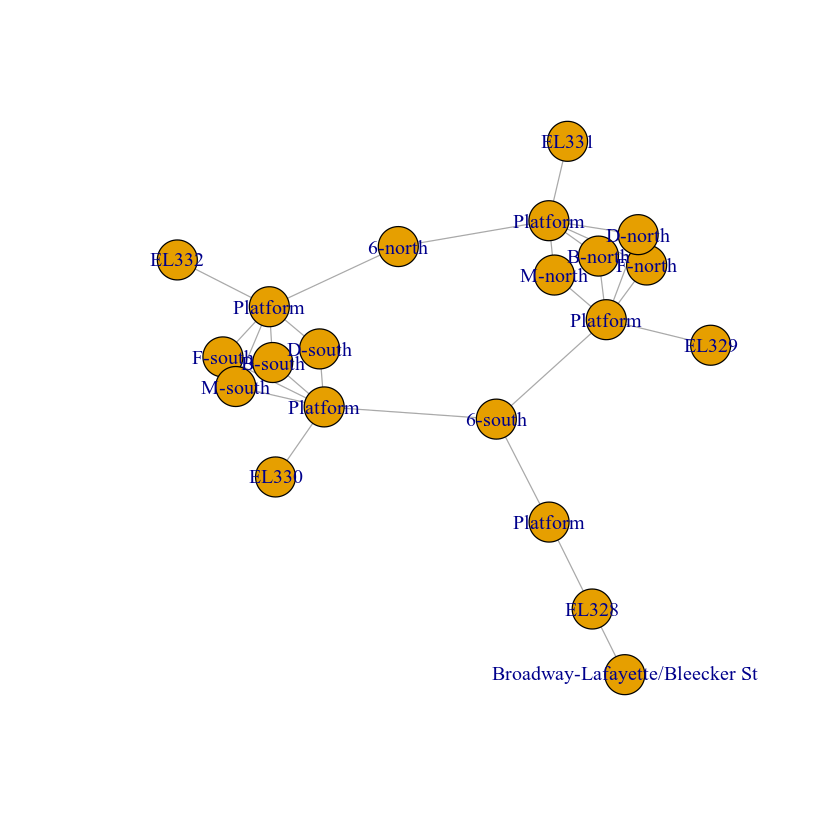

In [650]:
kh <- induced_subgraph(sg,V(sg)[V(sg)$station_name == "Broadway-Lafayette/Bleecker St"])
plot(kh)

In [649]:
V(sg)$station_name[grepl("Lafayette",V(sg)$station_name)]

[1] "Broadway-Lafayette/Bleecker St" "Broadway-Lafayette/Bleecker St"
 [3] "Broadway-Lafayette/Bleecker St" "Broadway-Lafayette/Bleecker St"
 [5] "Broadway-Lafayette/Bleecker St" "Broadway-Lafayette/Bleecker St"
 [7] "Broadway-Lafayette/Bleecker St" "Broadway-Lafayette/Bleecker St"
 [9] "Broadway-Lafayette/Bleecker St" "Broadway-Lafayette/Bleecker St"
[11] "Broadway-Lafayette/Bleecker St" "Broadway-Lafayette/Bleecker St"
[13] "Broadway-Lafayette/Bleecker St" "Broadway-Lafayette/Bleecker St"
[15] "Broadway-Lafayette/Bleecker St" "Broadway-Lafayette/Bleecker St"
[17] "Broadway-Lafayette/Bleecker St" "Broadway-Lafayette/Bleecker St"
[19] "Broadway-Lafayette/Bleecker St" "Broadway-Lafayette/Bleecker St"
[21] "Broadway-Lafayette/Bleecker St"

In [517]:
?png

png {grDevices},R Documentation
filename,"the name of the output file. The page number is substituted if a C integer format is included in the character string, as in the default. (The result must be less than PATH_MAX characters long, and may be truncated if not. See postscript for further details.) Tilde expansion is performed where supported by the platform."
width,the width of the device.
height,the height of the device.
units,"The units in which height and width are given. Can be px (pixels, the default), in (inches), cm or mm."
pointsize,"the default pointsize of plotted text, interpreted as big points (1/72 inch) at res ppi."
bg,"the initial background colour: can be overridden by setting par(""bg"")."
quality,"the ‘quality’ of the JPEG image, as a percentage. Smaller values will give more compression but also more degradation of the image."
compression,"the type of compression to be used. Ignored for type = ""quartz""."
res,"The nominal resolution in ppi which will be recorded in the bitmap file, if a positive integer. Also used for units other than the default, and to convert points to pixels."
...,"for type = ""Xlib"" only, additional arguments to the underlying X11 device such as fonts or family. For types ""cairo"" and ""quartz"", the family argument can be supplied. See the ‘Cairo fonts’ section in the help for X11."
